In [1]:
__author__ = "me"
__date__ = "2015_10_13"

%pylab inline
import pandas as pd
import numpy as np
import geopandas as gp

import pylab as plt
import os

import requests
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
plt.rcParams.update(s)

Populating the interactive namespace from numpy and matplotlib


/Users/casy/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
PARQA = os.getenv('PARQA')

## Calls to Districts

In [3]:
calls = pd.read_csv(PARQA + 'data/311/MatchedCalls.cav', index_col=0)

In [8]:
calls.head()

,Closed Date,Created Date,Location Type,NAME,Complaint Type,Descriptor,lat,lon,parkDistrict
0,01/03/2011 12:03:59 PM,12/31/2010 09:04:48 PM,Park,NaN,Maintenance or Facility,Snow or Ice,-73.931120,40.668798,B-09
3,01/03/2011 09:41:24 AM,12/31/2010 03:36:37 PM,Park,NaN,Maintenance or Facility,Snow or Ice,-73.962835,40.688556,B-02
4,01/03/2011 12:15:38 PM,12/31/2010 03:03:16 PM,Park,NaN,Maintenance or Facility,Snow or Ice,-73.999809,40.636935,B-12
6,01/03/2011 12:23:04 PM,12/31/2010 12:59:59 PM,Park,NaN,Maintenance or Facility,Snow or Ice,-73.999456,40.609951,B-11
7,01/03/2011 12:19:51 PM,12/31/2010 12:12:02 PM,Park,NaN,Maintenance or Facility,Snow or Ice,-73.977616,40.633153,B-14


In [16]:
callsByDistr = pd.DataFrame(calls.parkDistrict.value_counts()).reset_index().rename(columns={'parkDistrict':'calls',
                                                                                             'index':'parkDistrict'})

In [4]:
districts = gp.read_file(PARQA + 'data/Districts/Districts_tmp.geojson')

In [10]:
districts.head(2)

,ACRES,BOROUGH,COMMUNITYB,COUNCILDIS,SHAPE_Area,SHAPE_Leng,SYSTEM,geometry,id
0,None,M,101,"3, 1",32993723.208838,41661.646039,M-01,"POLYGON ((979362.7820722163 195771.7118528038,...",0
1,None,M,102,"3, 1, 2",37682859.456715,33897.229525,M-02,"POLYGON ((981041.1455133855 203852.925677225, ...",1


In [18]:
districtsAll = districts.merge(callsByDistr, how='left', left_on='SYSTEM',right_on='parkDistrict' )
districtsAll.head(2)                            

,ACRES,BOROUGH,COMMUNITYB,COUNCILDIS,SHAPE_Area,SHAPE_Leng,SYSTEM,geometry,id,parkDistrict,calls
0,None,M,101,"3, 1",32993723.208838,41661.646039,M-01,"POLYGON ((979362.7820722163 195771.7118528038,...",0,M-01,1126
1,None,M,102,"3, 1, 2",37682859.456715,33897.229525,M-02,"POLYGON ((981041.1455133855 203852.925677225, ...",1,M-02,1373


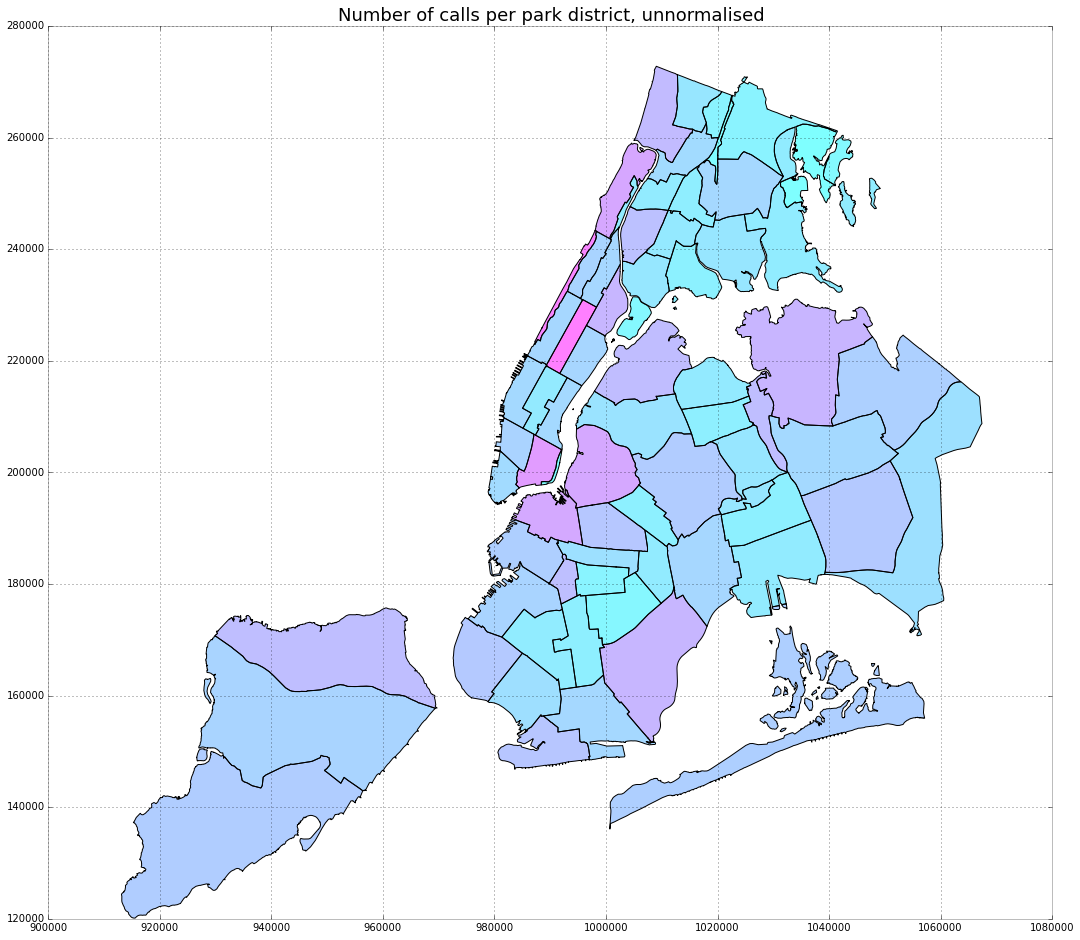

In [29]:
districtsAll.plot(figsize=(18,18), column='calls', colormap='cool');
plt.title('Number of calls per park district, unnormalised',fontsize=18);

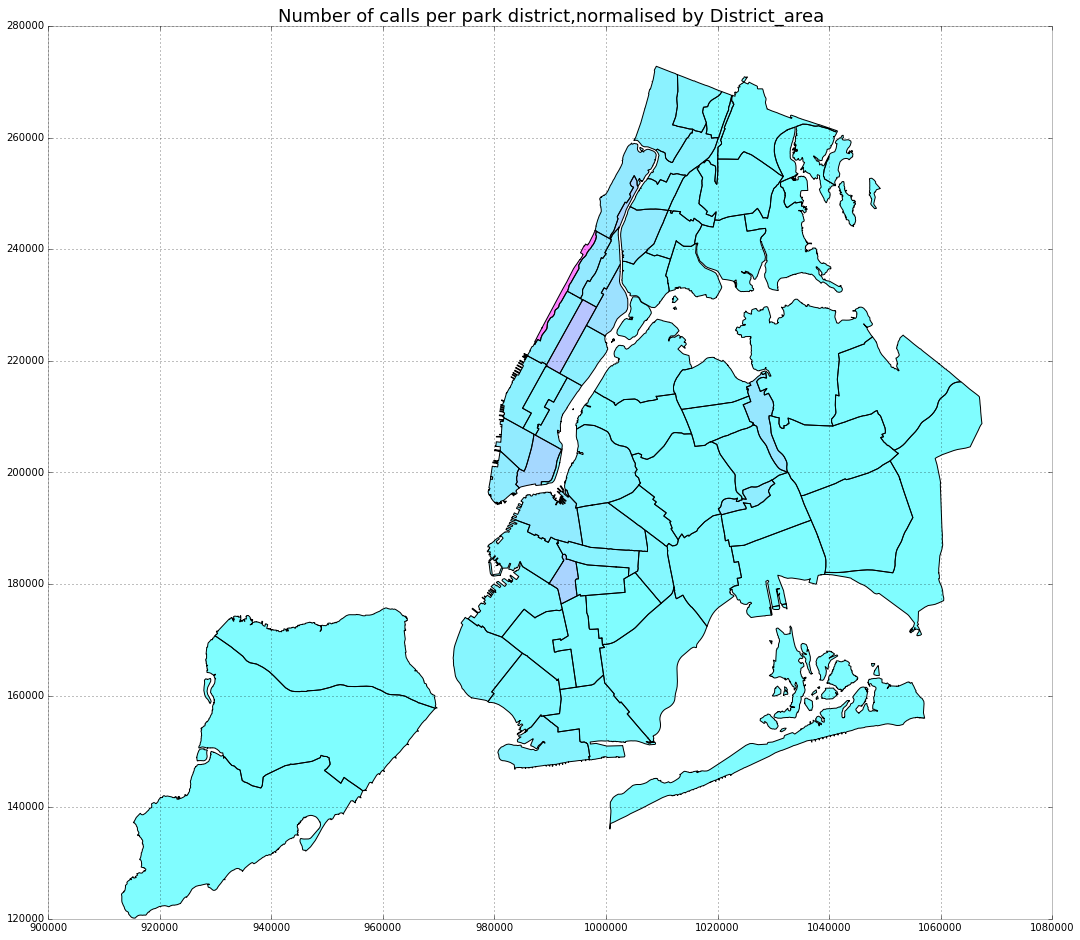

In [32]:
# now using shape area: need to calculate parks area per district.
districtsAll['calls_normalised'] = districtsAll['calls']/districtsAll['SHAPE_Area']
districtsAll.plot(figsize=(18,18), column='calls_normalised', colormap='cool');
plt.title('Number of calls per park district,normalised by District_area',fontsize=18);